In [51]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [32]:
data = pd.read_excel('superstore.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/07/2012,31/07/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/01/2013,30/01/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [16]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [19]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [33]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [28]:
data.head()

,Order Date,Market,Sales,Shipping Cost,Order Priority
0,2012-07-31,US,2309.650,933.57,Critical
1,2013-05-02,APAC,3709.395,923.63,Critical
2,2013-10-17,APAC,5175.171,915.49,Medium
3,2013-01-28,EU,2892.510,910.16,Medium
4,2013-05-11,Africa,2832.960,903.04,Critical


In [36]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit','Market','Shipping Cost','Order Priority']
data.drop(cols, axis = 1, inplace = True)
data.head()

KeyError: "['Row ID' 'Order ID' 'Ship Date' 'Ship Mode' 'Customer ID' 'Customer Name'\n 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region' 'Product ID'\n 'Category' 'Sub-Category' 'Product Name' 'Quantity' 'Discount' 'Profit'\n 'Market' 'Shipping Cost' 'Order Priority'] not found in axis"

In [38]:
data = data.sort_values('Order Date')

In [41]:
data.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2011-01-01,808.56300
1,2011-01-02,2455.67000
2,2011-01-03,12565.76630
3,2011-01-04,2582.80100
4,2011-01-06,11480.49270
5,2011-01-07,3844.65600
6,2011-01-08,6769.12150
7,2011-01-09,7250.91400
8,2011-01-10,1624.20712
9,2011-01-11,18667.51056


In [43]:
data = data.set_index('Order Date')
data.index

KeyError: 'Order Date'

In [49]:
y = data['Sales'].resample('MS').mean()
y['2017':]

Series([], Freq: MS, Name: Sales, dtype: float64)

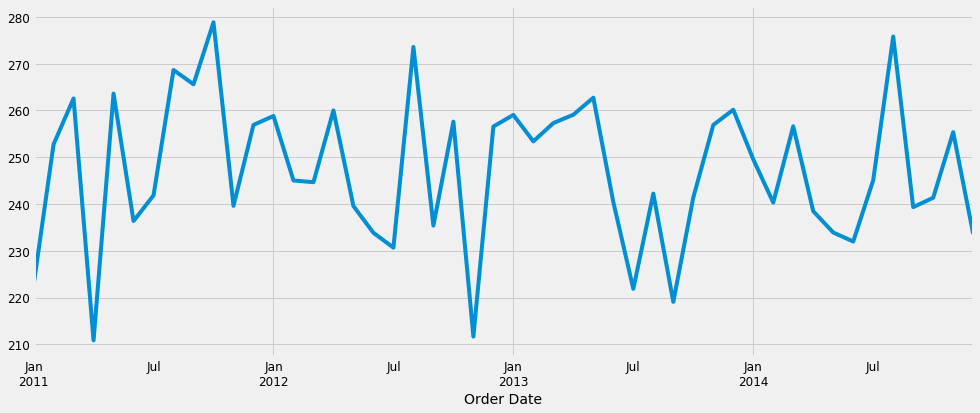

In [50]:
y.plot(figsize = (15, 6))
plt.show()

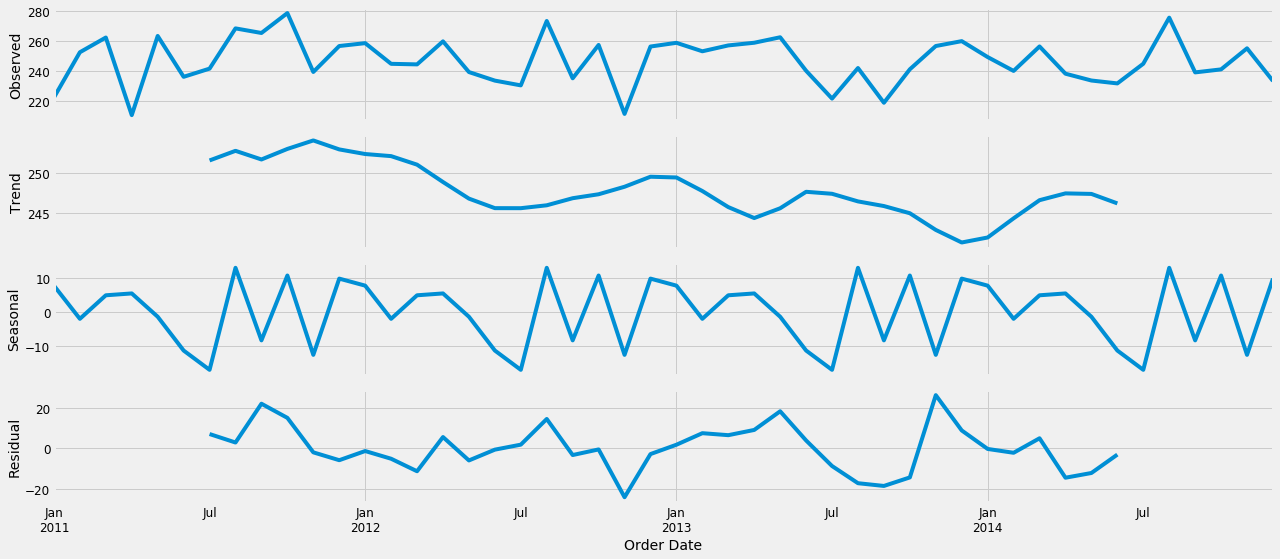

In [52]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [53]:
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [54]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:667.3692424274271


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2239.471588140132
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:323.2287062736911
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:491.5508850500605


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:494.0622716956191
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:321.232294794988
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:614.182481585441


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1927.8188622107025
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:324.6870692244086
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:487.8247588088884


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:484.8245879490622
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:322.92855815676324
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:430.9957397177943


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1501.8032439338149
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:332.6350380898277
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:429.8358529829486


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1701.4391334608583
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:331.5153317236828
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:401.48674965168476


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1782.7086405272523
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:320.68043716458084
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:402.9861416758172


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1342.6611046759851
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:319.31507406192077
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:446.59350671375046


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2370.726733197369
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:324.68764139062364
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:445.19092872629585
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:447.0096161978197
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:322.9074461369635


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:417.34428914808717


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1853.4112105346826
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:326.6789947061637


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:419.3689675441211


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:422.4315552602391
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:324.9018859260503
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:416.5486416157648
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1856.578798047219
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:328.90587824927707
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:418.0017492957002


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1841.9337605315047
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:326.56269355948746
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:403.21199786689743


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1876.2367372667097
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:321.9197138645012
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:404.8878252456922


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1771.2386983157498
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:320.8038259323077


In [55]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1314      0.220      0.596      0.551      -0.300       0.563
ma.L1         -0.9997     43.402     -0.023      0.982     -86.066      84.066
ar.S.L12      -0.3698      0.214     -1.728      0.084      -0.789       0.050
sigma2       380.5402   1.65e+04      0.023      0.982    -3.2e+04    3.27e+04


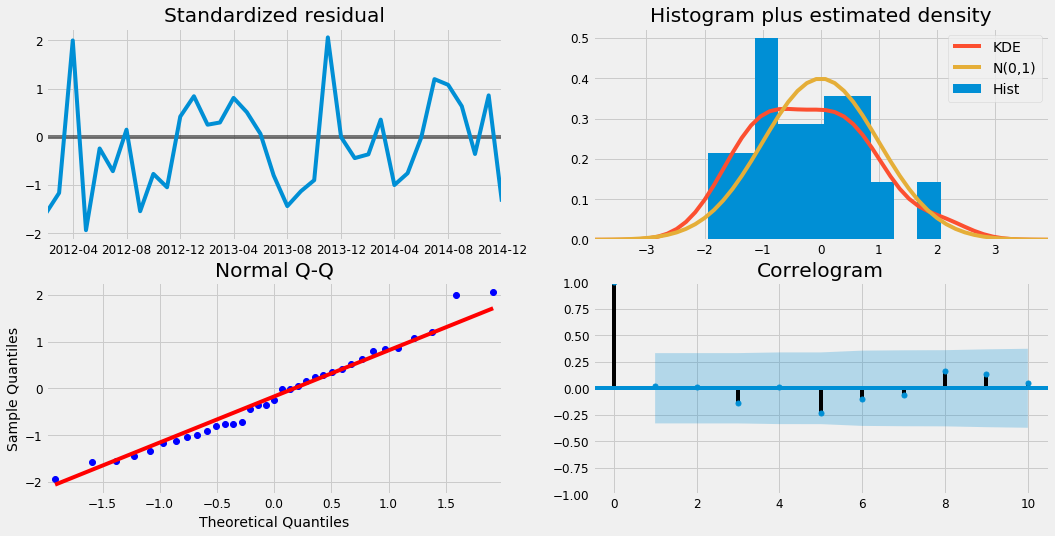

In [56]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [57]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


,lower Sales,upper Sales
2017-01-01,188.791305,303.325642


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

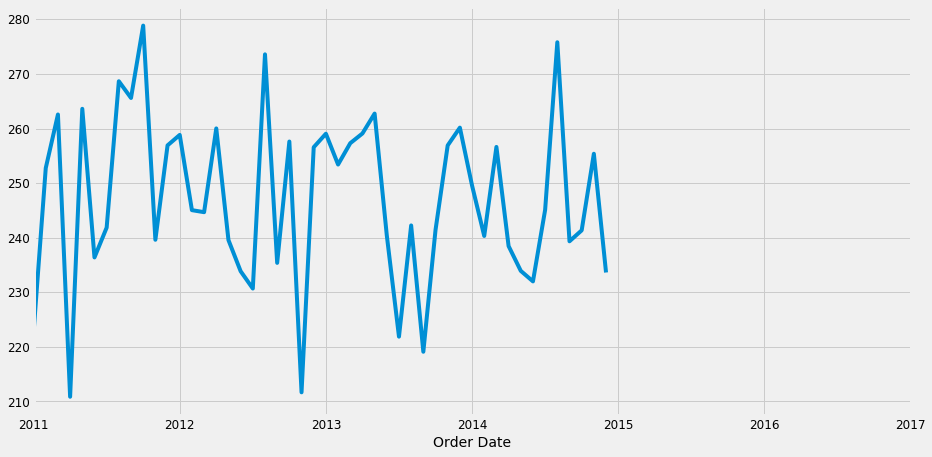

In [59]:
ax = y.plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

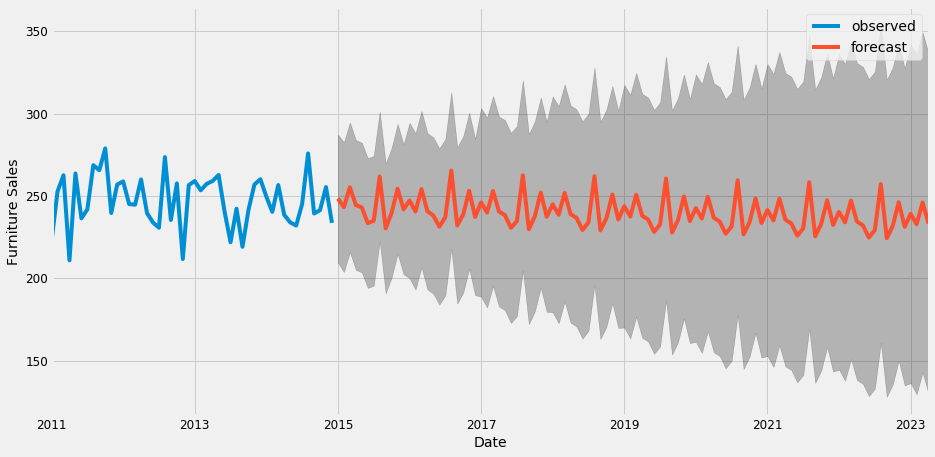

In [60]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()